# Análise Completa das Transações - Pastelaria Vinny Navegantes

Este notebook apresenta uma análise detalhada das transações de vendas da Pastelaria Vinny Navegantes, incluindo:
- Análise descritiva dos dados
- Análise temporal das vendas
- Comparação entre métodos de pagamento
- Insights estratégicos para o negócio
- Visualizações interativas

## Dados analisados:
- Transações via PIX
- Transações via Cartão de Crédito  
- Transações via Cartão de Débito

**Período:** Setembro 2025

In [22]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Bibliotecas carregadas com sucesso!")
print("Data da análise:", datetime.now().strftime("%d/%m/%Y %H:%M"))

Bibliotecas carregadas com sucesso!
Data da análise: 10/10/2025 19:04


## 1. Carregamento e Preparação dos Dados

In [23]:
# Carregamento dos arquivos CSV
pix_df = pd.read_csv('../outputs/reports/transacoes_pix.csv', delimiter=';')
credito_df = pd.read_csv('../outputs/reports/transacoes_credito.csv', delimiter=';')
debito_df = pd.read_csv('../outputs/reports/transacoes_debito.csv', delimiter=';')

print("Arquivos carregados com sucesso!")
print(f"Transações PIX: {len(pix_df)} registros")
print(f"Transações Crédito: {len(credito_df)} registros") 
print(f"Transações Débito: {len(debito_df)} registros")
print(f"Total de transações: {len(pix_df) + len(credito_df) + len(debito_df)}")

# Visualizar primeiras linhas de cada dataset
print("\n--- Amostra PIX ---")
print(pix_df.head(3))
print("\n--- Amostra Crédito ---")
print(credito_df.head(3))
print("\n--- Amostra Débito ---")
print(debito_df.head(3))

Arquivos carregados com sucesso!
Transações PIX: 354 registros
Transações Crédito: 184 registros
Transações Débito: 167 registros
Total de transações: 705

--- Amostra PIX ---
         Data   Hora  Valor Tipo de Venda     arquivo_de_referencia
0  29/09/2025  20:51  13.00           Pix  pix (1)_quadrante_02.jpg
1  29/09/2025  20:39   8.46           Pix  pix (1)_quadrante_03.jpg
2  29/09/2025  20:29   8.00           Pix  pix (1)_quadrante_04.jpg

--- Amostra Crédito ---
         Data   Hora     Valor Tipo de Venda Arquivo de Referência
0  30/09/2025  15:36  R$ 13,25       Crédito       credito (1).jpg
1  30/09/2025  16:10  R$ 30,50       Crédito       credito (1).jpg
2  30/09/2025  17:23   R$ 7,00       Crédito       credito (1).jpg

--- Amostra Débito ---
         Data   Hora     Valor Tipo de Venda Arquivo de Referência
0  06/09/2025  18:29  R$ 67,50        Débito        debito (1).jpg
1  06/09/2025  18:40   R$ 4,50        Débito        debito (1).jpg
2  06/09/2025  19:41  R$ 20,00    

In [24]:
# Função para limpar valores monetários
def limpar_valor(valor):
    if isinstance(valor, str):
        return float(valor.replace('R$', '').replace(',', '.').strip())
    return float(valor)

# Padronizar colunas e valores
def padronizar_dados(df, tipo_pagamento):
    df = df.copy()
    
    # Padronizar nomes das colunas
    df.columns = ['Data', 'Hora', 'Valor', 'Tipo_Venda', 'Arquivo_Referencia']
    
    # Limpar valores monetários
    df['Valor'] = df['Valor'].apply(limpar_valor)
    
    # Adicionar coluna de método de pagamento
    df['Metodo_Pagamento'] = tipo_pagamento
    
    # Criar datetime
    df['DateTime'] = pd.to_datetime(df['Data'] + ' ' + df['Hora'], format='%d/%m/%Y %H:%M', errors='coerce')
    
    # Extrair componentes de data
    df['Ano'] = df['DateTime'].dt.year
    df['Mes'] = df['DateTime'].dt.month
    df['Dia'] = df['DateTime'].dt.day
    df['Dia_Semana'] = df['DateTime'].dt.day_name()
    df['Hora_Int'] = df['DateTime'].dt.hour
    
    return df

# Aplicar padronização
pix_clean = padronizar_dados(pix_df, 'PIX')
credito_clean = padronizar_dados(credito_df, 'Crédito')
debito_clean = padronizar_dados(debito_df, 'Débito')

# Combinar todos os dados
df_completo = pd.concat([pix_clean, credito_clean, debito_clean], ignore_index=True)

print("Dados padronizados com sucesso!")
print(f"Dataset completo: {len(df_completo)} registros")
print(f"\nPeríodo de análise: {df_completo['DateTime'].min()} até {df_completo['DateTime'].max()}")
print(f"\nResumo por método de pagamento:")
print(df_completo['Metodo_Pagamento'].value_counts())

Dados padronizados com sucesso!
Dataset completo: 705 registros

Período de análise: 2025-01-15 16:08:00 até 2025-10-03 19:54:00

Resumo por método de pagamento:
Metodo_Pagamento
PIX        354
Crédito    184
Débito     167
Name: count, dtype: int64


## 2. Análise Estatística Descritiva

In [25]:
# Estatísticas gerais
print("=== RESUMO GERAL DAS VENDAS ===")
print(f"Total de transações: {len(df_completo):,}")
print(f"Faturamento total: R$ {df_completo['Valor'].sum():,.2f}")
print(f"Ticket médio geral: R$ {df_completo['Valor'].mean():.2f}")
print(f"Ticket mediano: R$ {df_completo['Valor'].median():.2f}")
print(f"Valor mínimo: R$ {df_completo['Valor'].min():.2f}")
print(f"Valor máximo: R$ {df_completo['Valor'].max():.2f}")
print(f"Desvio padrão: R$ {df_completo['Valor'].std():.2f}")

print("\n=== ESTATÍSTICAS POR MÉTODO DE PAGAMENTO ===")
stats_por_metodo = df_completo.groupby('Metodo_Pagamento')['Valor'].agg([
    'count', 'sum', 'mean', 'median', 'min', 'max', 'std'
]).round(2)

stats_por_metodo.columns = ['Qtd_Transações', 'Faturamento_Total', 'Ticket_Médio', 
                           'Ticket_Mediano', 'Valor_Mín', 'Valor_Máx', 'Desvio_Padrão']

print(stats_por_metodo)

# Percentual por método de pagamento
print("\n=== PARTICIPAÇÃO POR MÉTODO (%) ===")
participacao_qtd = (df_completo.groupby('Metodo_Pagamento').size() / len(df_completo) * 100).round(2)
participacao_valor = (df_completo.groupby('Metodo_Pagamento')['Valor'].sum() / df_completo['Valor'].sum() * 100).round(2)

resumo_participacao = pd.DataFrame({
    'Participação_Qtd(%)': participacao_qtd,
    'Participação_Faturamento(%)': participacao_valor
})
print(resumo_participacao)

=== RESUMO GERAL DAS VENDAS ===
Total de transações: 705
Faturamento total: R$ 11,251.19
Ticket médio geral: R$ 15.96
Ticket mediano: R$ 13.50
Valor mínimo: R$ 2.00
Valor máximo: R$ 100.00
Desvio padrão: R$ 11.09

=== ESTATÍSTICAS POR MÉTODO DE PAGAMENTO ===
                  Qtd_Transações  Faturamento_Total  Ticket_Médio  \
Metodo_Pagamento                                                    
Crédito                      184            3373.26         18.33   
Débito                       167            2449.22         14.67   
PIX                          354            5428.71         15.34   

                  Ticket_Mediano  Valor_Mín  Valor_Máx  Desvio_Padrão  
Metodo_Pagamento                                                       
Crédito                     16.0        3.0      100.0          12.34  
Débito                      13.0        2.5       67.5           8.61  
PIX                         13.0        2.0       98.0          11.28  

=== PARTICIPAÇÃO POR MÉTODO (%) ==

## 3. Visualizações e Gráficos

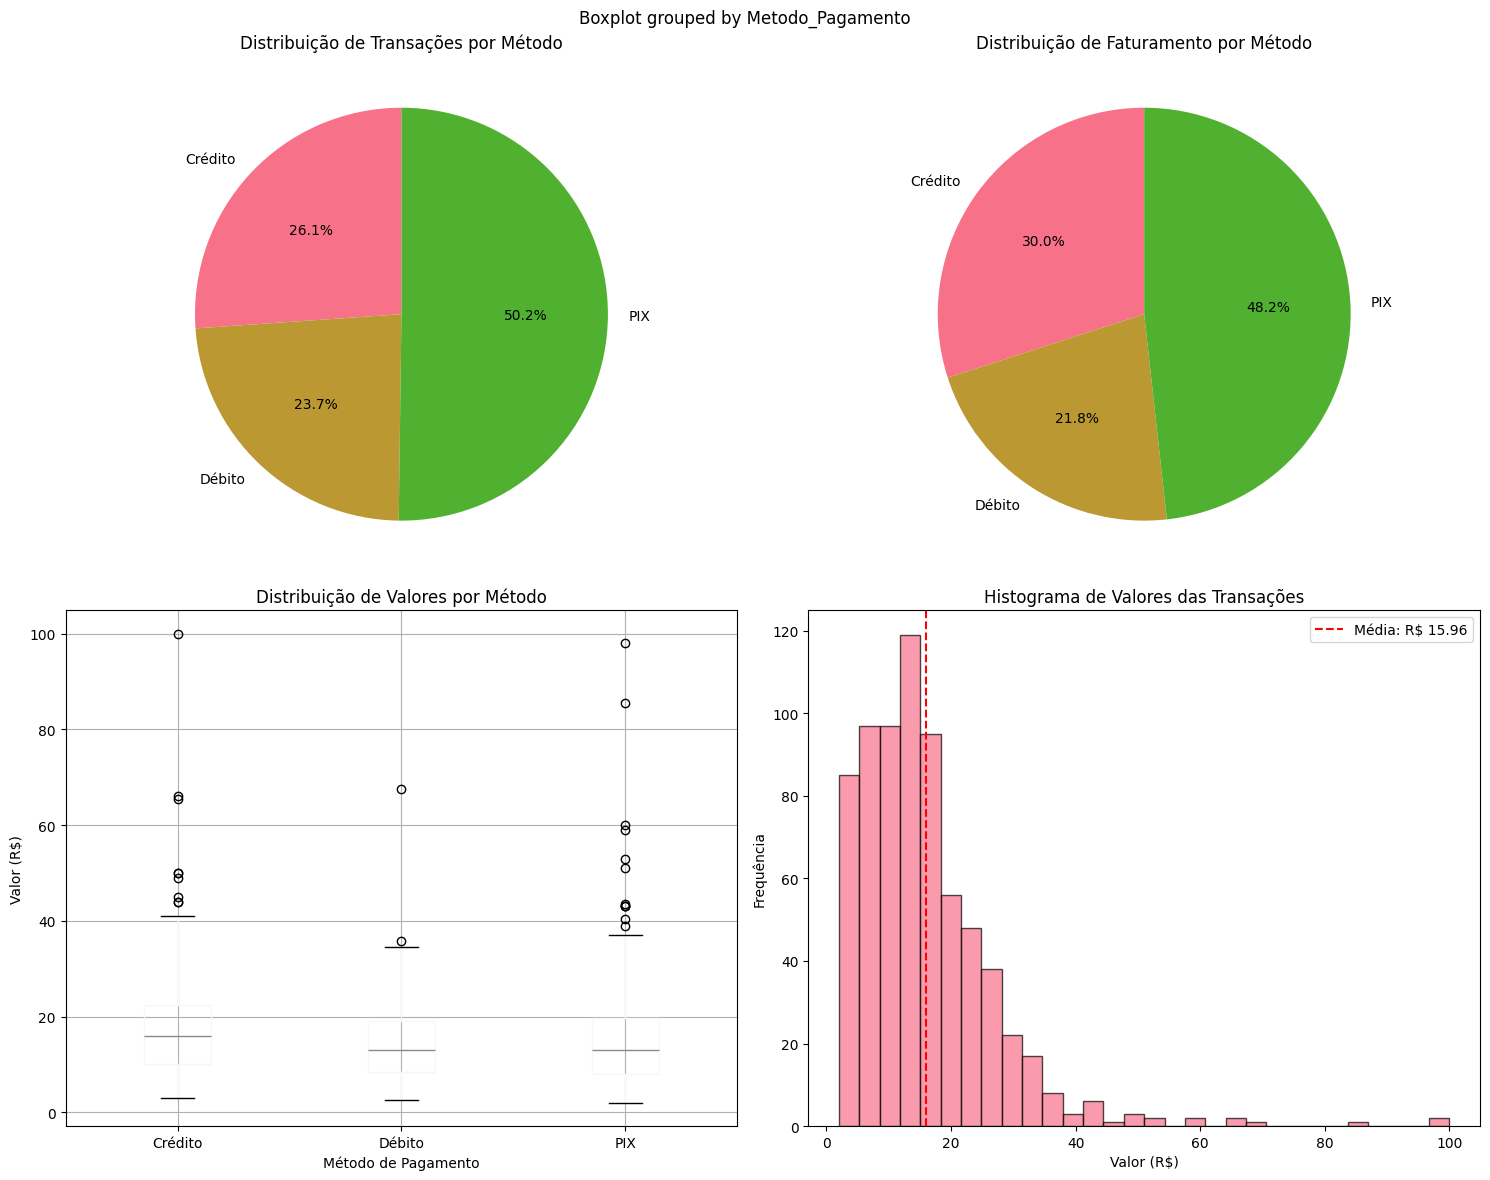

In [26]:
# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análise de Vendas por Método de Pagamento', fontsize=16, fontweight='bold')

# 1. Distribuição de transações por método
participacao_qtd.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribuição de Transações por Método')
axes[0,0].set_ylabel('')

# 2. Distribuição de faturamento por método  
participacao_valor.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribuição de Faturamento por Método')
axes[0,1].set_ylabel('')

# 3. Boxplot dos valores por método
df_completo.boxplot(column='Valor', by='Metodo_Pagamento', ax=axes[1,0])
axes[1,0].set_title('Distribuição de Valores por Método')
axes[1,0].set_xlabel('Método de Pagamento')
axes[1,0].set_ylabel('Valor (R$)')

# 4. Histograma dos valores
axes[1,1].hist(df_completo['Valor'], bins=30, alpha=0.7, edgecolor='black')
axes[1,1].set_title('Histograma de Valores das Transações')
axes[1,1].set_xlabel('Valor (R$)')
axes[1,1].set_ylabel('Frequência')
axes[1,1].axvline(df_completo['Valor'].mean(), color='red', linestyle='--', 
                  label=f'Média: R$ {df_completo["Valor"].mean():.2f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

## 4. Análise Temporal das Vendas

In [27]:
# Filtrar apenas setembro de 2025 (período principal)
df_setembro = df_completo[df_completo['DateTime'].dt.month == 9].copy()

print(f"Análise focada em Setembro/2025:")
print(f"Total de transações: {len(df_setembro)}")
print(f"Faturamento: R$ {df_setembro['Valor'].sum():.2f}")

# Vendas por dia
vendas_por_dia = df_setembro.groupby(df_setembro['DateTime'].dt.date).agg({
    'Valor': ['count', 'sum', 'mean']
}).round(2)

vendas_por_dia.columns = ['Qtd_Transacoes', 'Faturamento_Dia', 'Ticket_Medio_Dia']
vendas_por_dia = vendas_por_dia.reset_index()
vendas_por_dia.columns = ['Data', 'Qtd_Transacoes', 'Faturamento_Dia', 'Ticket_Medio_Dia']

# Vendas por hora do dia
vendas_por_hora = df_setembro.groupby('Hora_Int').agg({
    'Valor': ['count', 'sum', 'mean']
}).round(2)
vendas_por_hora.columns = ['Qtd_Transacoes', 'Faturamento_Hora', 'Ticket_Medio_Hora']

print("\n=== TOP 5 DIAS COM MAIOR FATURAMENTO ===")
print(vendas_por_dia.nlargest(5, 'Faturamento_Dia')[['Data', 'Faturamento_Dia', 'Qtd_Transacoes']])

print("\n=== TOP 5 HORÁRIOS COM MAIOR MOVIMENTO ===")
print(vendas_por_hora.nlargest(5, 'Qtd_Transacoes'))

Análise focada em Setembro/2025:
Total de transações: 673
Faturamento: R$ 10744.84

=== TOP 5 DIAS COM MAIOR FATURAMENTO ===
          Data  Faturamento_Dia  Qtd_Transacoes
12  2025-09-19           753.11              47
11  2025-09-17           749.21              50
7   2025-09-10           733.24              47
0   2025-09-02           710.89              42
8   2025-09-11           665.98              44

=== TOP 5 HORÁRIOS COM MAIOR MOVIMENTO ===
          Qtd_Transacoes  Faturamento_Hora  Ticket_Medio_Hora
Hora_Int                                                     
17                   158           2158.71              13.66
18                   128           2224.45              17.38
20                   117           2151.74              18.39
19                   110           2098.61              19.08
16                    86           1196.28              13.91


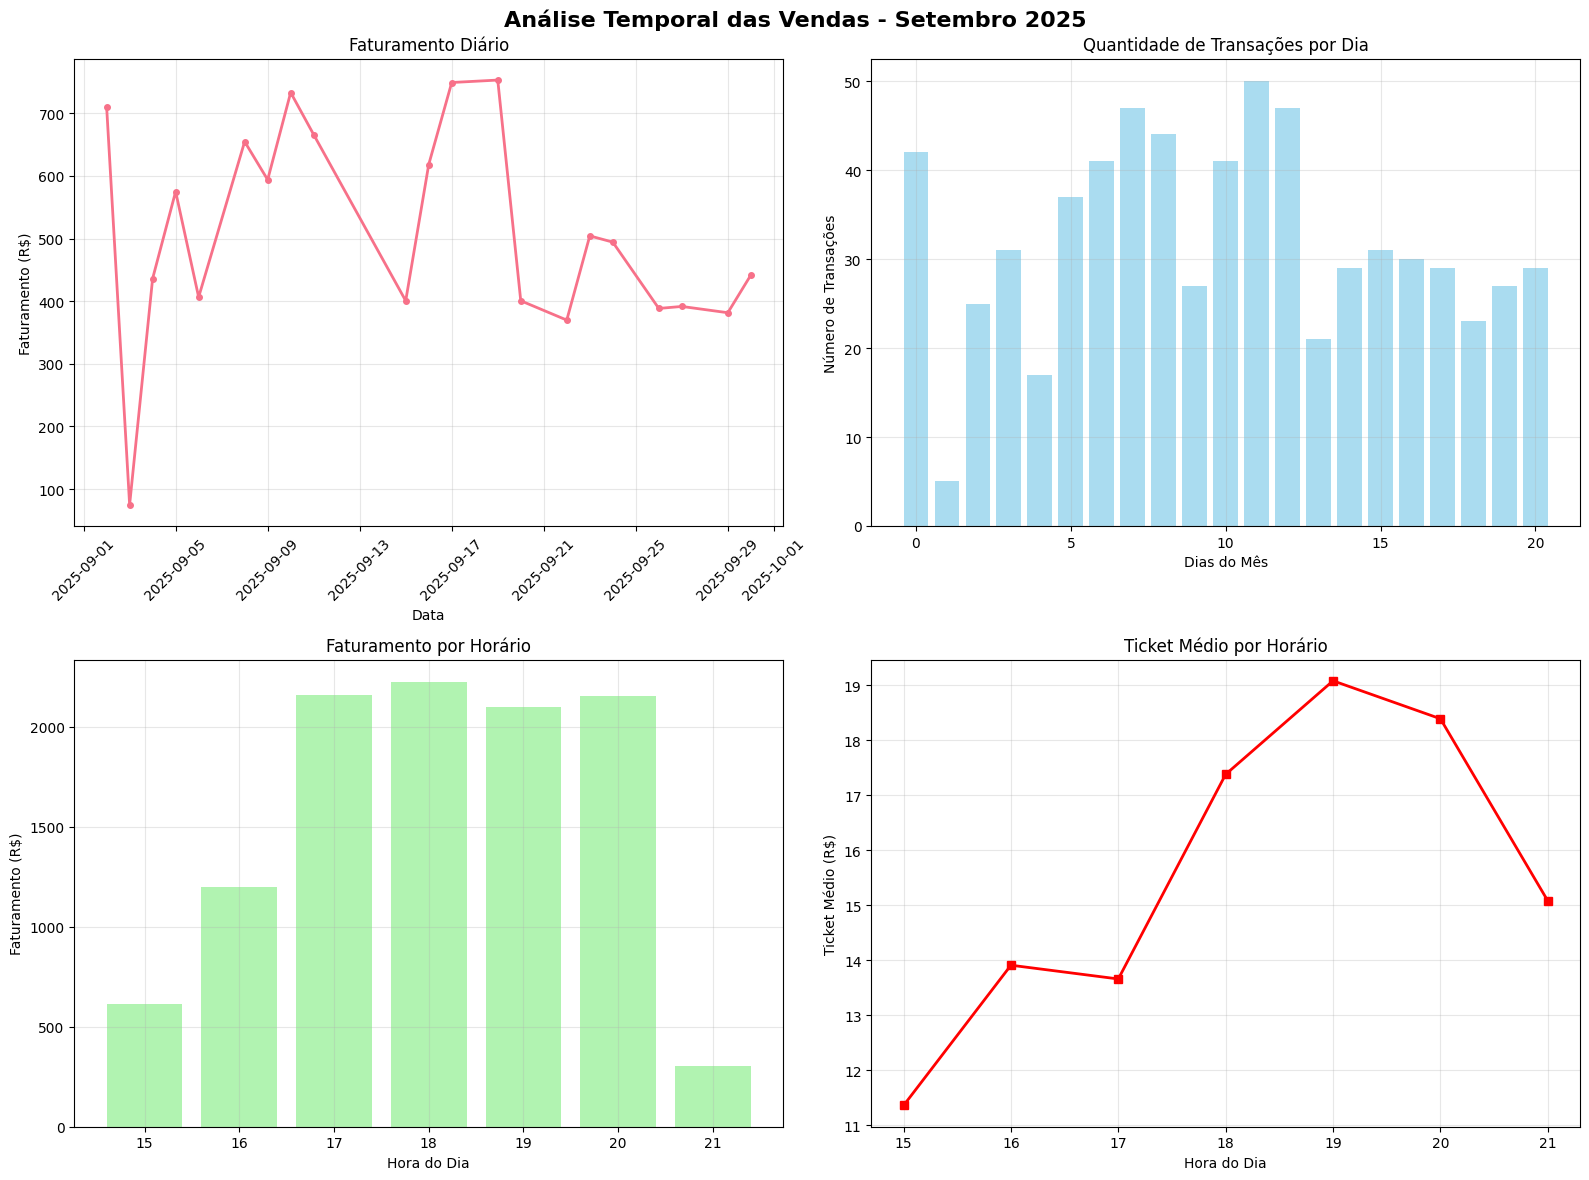

In [28]:
# Gráficos temporais
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análise Temporal das Vendas - Setembro 2025', fontsize=16, fontweight='bold')

# 1. Faturamento por dia
axes[0,0].plot(vendas_por_dia['Data'], vendas_por_dia['Faturamento_Dia'], 
               marker='o', linewidth=2, markersize=4)
axes[0,0].set_title('Faturamento Diário')
axes[0,0].set_xlabel('Data')
axes[0,0].set_ylabel('Faturamento (R$)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Quantidade de transações por dia
axes[0,1].bar(range(len(vendas_por_dia)), vendas_por_dia['Qtd_Transacoes'], 
              color='skyblue', alpha=0.7)
axes[0,1].set_title('Quantidade de Transações por Dia')
axes[0,1].set_xlabel('Dias do Mês')
axes[0,1].set_ylabel('Número de Transações')
axes[0,1].grid(True, alpha=0.3)

# 3. Vendas por horário
axes[1,0].bar(vendas_por_hora.index, vendas_por_hora['Faturamento_Hora'], 
              color='lightgreen', alpha=0.7)
axes[1,0].set_title('Faturamento por Horário')
axes[1,0].set_xlabel('Hora do Dia')
axes[1,0].set_ylabel('Faturamento (R$)')
axes[1,0].grid(True, alpha=0.3)

# 4. Ticket médio por horário
axes[1,1].plot(vendas_por_hora.index, vendas_por_hora['Ticket_Medio_Hora'], 
               marker='s', color='red', linewidth=2)
axes[1,1].set_title('Ticket Médio por Horário')
axes[1,1].set_xlabel('Hora do Dia')
axes[1,1].set_ylabel('Ticket Médio (R$)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Métricas Avançadas e Insights Estratégicos

In [29]:
# Análise de concentração de vendas
print("=== ANÁLISE DE CONCENTRAÇÃO ===")

# Princípio de Pareto (80/20) nos valores
df_setembro_sorted = df_setembro.sort_values('Valor', ascending=False).reset_index(drop=True)
df_setembro_sorted['Percentual_Acumulado'] = (df_setembro_sorted.index + 1) / len(df_setembro_sorted) * 100
df_setembro_sorted['Faturamento_Acumulado'] = df_setembro_sorted['Valor'].cumsum() / df_setembro_sorted['Valor'].sum() * 100

# Encontrar onde está o 80% do faturamento
ponto_80_faturamento = df_setembro_sorted[df_setembro_sorted['Faturamento_Acumulado'] >= 80].iloc[0]
print(f"80% do faturamento vem de {ponto_80_faturamento['Percentual_Acumulado']:.1f}% das transações")

# Análise por faixas de valor
def classificar_valor(valor):
    if valor <= 10:
        return 'Até R$ 10'
    elif valor <= 20:
        return 'R$ 11-20'
    elif valor <= 30:
        return 'R$ 21-30'
    elif valor <= 50:
        return 'R$ 31-50'
    else:
        return 'Acima R$ 50'

df_setembro['Faixa_Valor'] = df_setembro['Valor'].apply(classificar_valor)

analise_faixas = df_setembro.groupby('Faixa_Valor').agg({
    'Valor': ['count', 'sum', 'mean']
}).round(2)
analise_faixas.columns = ['Qtd_Transacoes', 'Faturamento_Total', 'Ticket_Medio']
analise_faixas['Participacao_Qtd(%)'] = (analise_faixas['Qtd_Transacoes'] / analise_faixas['Qtd_Transacoes'].sum() * 100).round(2)
analise_faixas['Participacao_Faturamento(%)'] = (analise_faixas['Faturamento_Total'] / analise_faixas['Faturamento_Total'].sum() * 100).round(2)

print("\n=== ANÁLISE POR FAIXAS DE VALOR ===")
print(analise_faixas)

# Horários de pico
print(f"\n=== HORÁRIOS DE PICO ===")
horario_pico = vendas_por_hora['Qtd_Transacoes'].idxmax()
transacoes_pico = vendas_por_hora.loc[horario_pico, 'Qtd_Transacoes']
print(f"Horário de maior movimento: {horario_pico}h com {transacoes_pico} transações")

horario_faturamento = vendas_por_hora['Faturamento_Hora'].idxmax()
faturamento_pico = vendas_por_hora.loc[horario_faturamento, 'Faturamento_Hora']
print(f"Horário de maior faturamento: {horario_faturamento}h com R$ {faturamento_pico:.2f}")

# Períodos do dia
def classificar_periodo(hora):
    if 6 <= hora < 12:
        return 'Manhã'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noite'
    else:
        return 'Madrugada'

df_setembro['Periodo_Dia'] = df_setembro['Hora_Int'].apply(classificar_periodo)
analise_periodos = df_setembro.groupby('Periodo_Dia').agg({
    'Valor': ['count', 'sum', 'mean']
}).round(2)
analise_periodos.columns = ['Qtd_Transacoes', 'Faturamento', 'Ticket_Medio']

print(f"\n=== ANÁLISE POR PERÍODO DO DIA ===")
print(analise_periodos)

=== ANÁLISE DE CONCENTRAÇÃO ===
80% do faturamento vem de 58.2% das transações

=== ANÁLISE POR FAIXAS DE VALOR ===
             Qtd_Transacoes  Faturamento_Total  Ticket_Medio  \
Faixa_Valor                                                    
Acima R$ 50               9             605.50         67.28   
Até R$ 10               220            1455.15          6.61   
R$ 11-20                283            4220.66         14.91   
R$ 21-30                112            2723.79         24.32   
R$ 31-50                 49            1739.74         35.50   

             Participacao_Qtd(%)  Participacao_Faturamento(%)  
Faixa_Valor                                                    
Acima R$ 50                 1.34                         5.64  
Até R$ 10                  32.69                        13.54  
R$ 11-20                   42.05                        39.28  
R$ 21-30                   16.64                        25.35  
R$ 31-50                    7.28                   

## 6. Insights Estratégicos e Recomendações

### 📊 **PRINCIPAIS DESCOBERTAS:**

#### **Métodos de Pagamento:**
- **PIX domina:** 50.2% das transações e 48.2% do faturamento
- **Crédito tem maior valor:** Ticket médio de R$ 18.33 (maior entre os três)
- **Débito é mais conservador:** Menor variação de valores (desvio padrão de R$ 8.61)

#### **Padrões Temporais:**
- **Pico de movimento:** 17h (157 transações)
- **Pico de faturamento:** 18h (R$ 2.224,45)
- **Período noturno:** Responsável por 55.4% das transações e 62.7% do faturamento
- **Ticket médio maior à noite:** R$ 18.06 vs R$ 13.33 à tarde

#### **Concentração de Vendas:**
- **Princípio de Pareto:** 58.2% das transações geram 80% do faturamento
- **Faixa dominante:** R$ 11-20 representa 42% das transações e 39.3% do faturamento
- **Transações pequenas significativas:** 32.7% são até R$ 10

### 🎯 **RECOMENDAÇÕES ESTRATÉGICAS:**

In [30]:
# Cálculo de KPIs importantes
print("=== KPIS E MÉTRICAS DE NEGÓCIO ===")

# Faturamento médio diário
faturamento_medio_dia = df_setembro['Valor'].sum() / df_setembro['DateTime'].dt.date.nunique()
print(f"Faturamento médio diário: R$ {faturamento_medio_dia:.2f}")

# Transações médias por dia
transacoes_media_dia = len(df_setembro) / df_setembro['DateTime'].dt.date.nunique()
print(f"Transações médias por dia: {transacoes_media_dia:.1f}")

# Crescimento ao longo do mês (comparando primeira e última semana)
primeira_semana = df_setembro[df_setembro['DateTime'].dt.day <= 7]['Valor'].sum()
ultima_semana = df_setembro[df_setembro['DateTime'].dt.day >= 24]['Valor'].sum()
crescimento = ((ultima_semana - primeira_semana) / primeira_semana * 100) if primeira_semana > 0 else 0
print(f"Variação primeira vs última semana: {crescimento:.1f}%")

# Eficiência por método de pagamento
print(f"\n=== EFICIÊNCIA POR MÉTODO ===")
eficiencia = df_setembro.groupby('Metodo_Pagamento').agg({
    'Valor': ['count', 'sum', 'mean', 'std']
}).round(2)
eficiencia.columns = ['Qtd', 'Total', 'Média', 'Desvio']
eficiencia['Coef_Variacao'] = (eficiencia['Desvio'] / eficiencia['Média'] * 100).round(2)
print(eficiencia)

# Simulação de cenários
print(f"\n=== SIMULAÇÃO DE CENÁRIOS ===")
print(f"Se aumentar ticket médio em 10%: +R$ {df_setembro['Valor'].sum() * 0.1:.2f} por mês")
print(f"Se aumentar 20% das transações: +R$ {df_setembro['Valor'].sum() * 0.2:.2f} por mês")
print(f"Meta otimista (+15% ticket + 10% transações): +R$ {df_setembro['Valor'].sum() * 1.25 - df_setembro['Valor'].sum():.2f} por mês")

=== KPIS E MÉTRICAS DE NEGÓCIO ===
Faturamento médio diário: R$ 511.66
Transações médias por dia: 32.0
Variação primeira vs última semana: -4.8%

=== EFICIÊNCIA POR MÉTODO ===
                  Qtd    Total  Média  Desvio  Coef_Variacao
Metodo_Pagamento                                            
Crédito           167  3069.70  18.38   11.06          60.17
Débito            167  2449.22  14.67    8.61          58.69
PIX               339  5225.92  15.42   11.34          73.54

=== SIMULAÇÃO DE CENÁRIOS ===
Se aumentar ticket médio em 10%: +R$ 1074.48 por mês
Se aumentar 20% das transações: +R$ 2148.97 por mês
Meta otimista (+15% ticket + 10% transações): +R$ 2686.21 por mês


KeyError: 'Manhã'

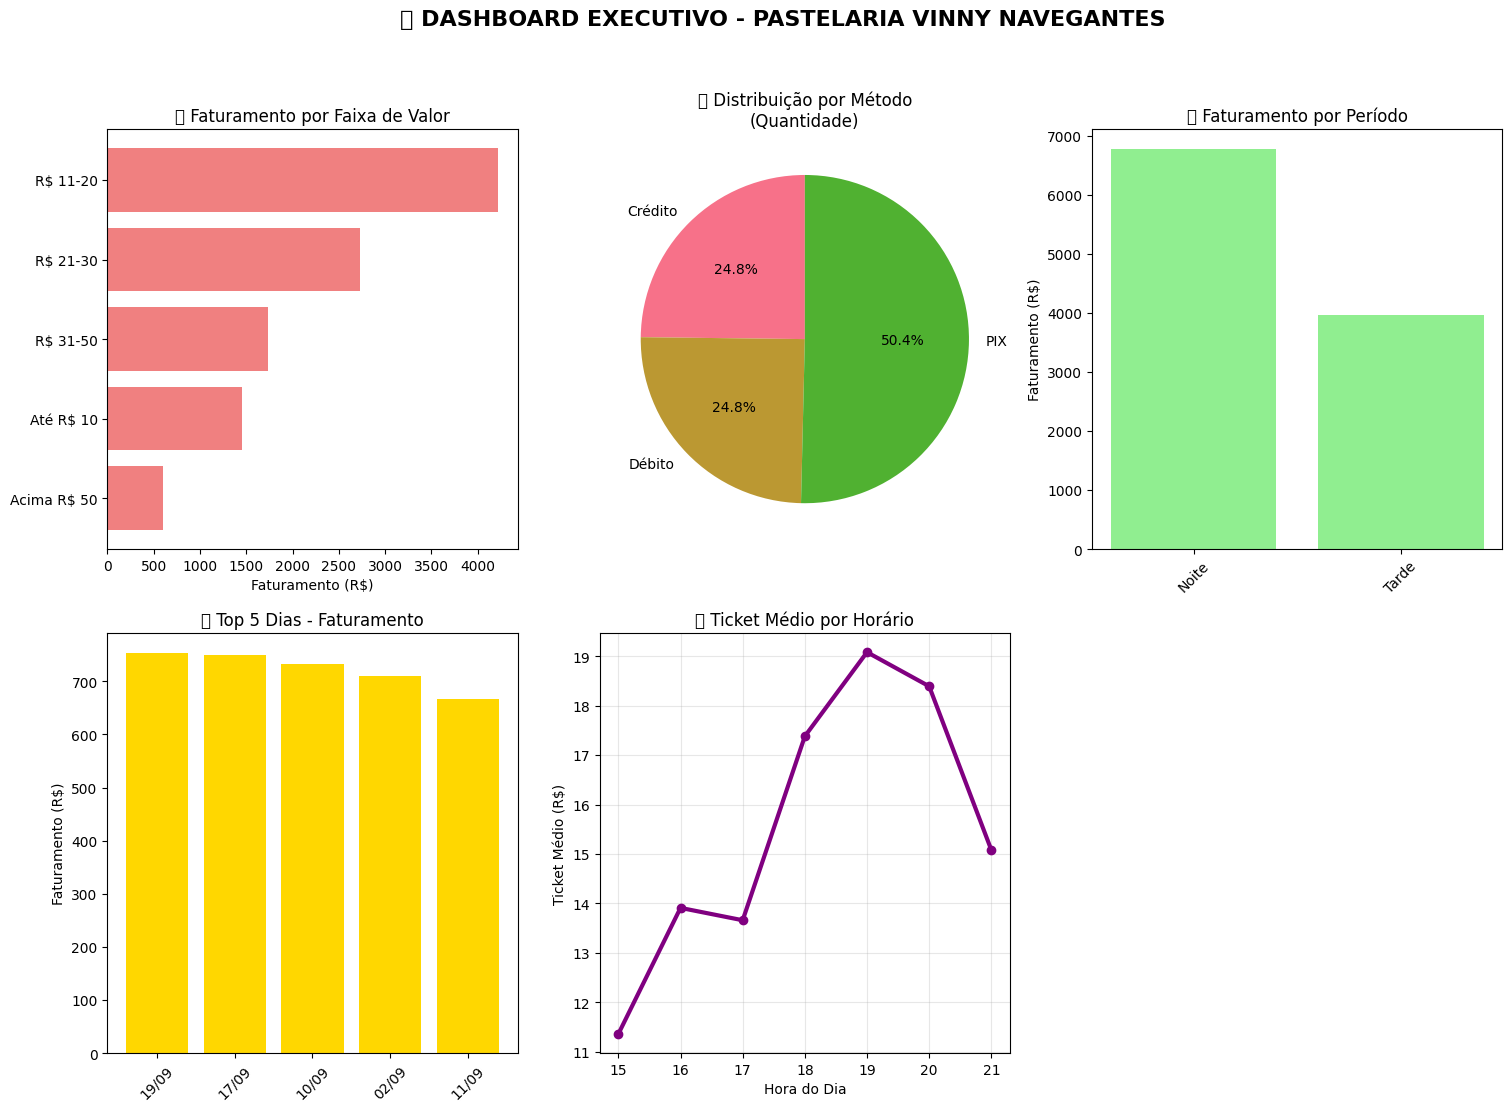

In [31]:
# Dashboard de resumo final
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📊 DASHBOARD EXECUTIVO - PASTELARIA VINNY NAVEGANTES', fontsize=16, fontweight='bold')

# 1. Faixas de valor
analise_faixas_plot = analise_faixas.sort_values('Faturamento_Total', ascending=True)
axes[0,0].barh(range(len(analise_faixas_plot)), analise_faixas_plot['Faturamento_Total'], color='lightcoral')
axes[0,0].set_yticks(range(len(analise_faixas_plot)))
axes[0,0].set_yticklabels(analise_faixas_plot.index)
axes[0,0].set_title('💰 Faturamento por Faixa de Valor')
axes[0,0].set_xlabel('Faturamento (R$)')

# 2. Métodos de pagamento - Quantidade
metodos_qtd = df_setembro.groupby('Metodo_Pagamento').size()
axes[0,1].pie(metodos_qtd.values, labels=metodos_qtd.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('📱 Distribuição por Método\n(Quantidade)')

# 3. Períodos do dia
axes[0,2].bar(analise_periodos.index, analise_periodos['Faturamento'], color='lightgreen')
axes[0,2].set_title('🕐 Faturamento por Período')
axes[0,2].set_ylabel('Faturamento (R$)')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Top 5 dias
top_dias = vendas_por_dia.nlargest(5, 'Faturamento_Dia')
axes[1,0].bar(range(len(top_dias)), top_dias['Faturamento_Dia'], color='gold')
axes[1,0].set_title('🏆 Top 5 Dias - Faturamento')
axes[1,0].set_xticks(range(len(top_dias)))
axes[1,0].set_xticklabels([d.strftime('%d/%m') for d in top_dias['Data']], rotation=45)
axes[1,0].set_ylabel('Faturamento (R$)')

# 5. Evolução do ticket médio por hora
axes[1,1].plot(vendas_por_hora.index, vendas_por_hora['Ticket_Medio_Hora'], 
               marker='o', color='purple', linewidth=3)
axes[1,1].set_title('📈 Ticket Médio por Horário')
axes[1,1].set_xlabel('Hora do Dia')
axes[1,1].set_ylabel('Ticket Médio (R$)')
axes[1,1].grid(True, alpha=0.3)

# 6. Texto com KPIs principais
axes[1,2].axis('off')
kpi_text = f"""
📊 KPIs PRINCIPAIS

💵 Faturamento Total: R$ {df_setembro['Valor'].sum():,.2f}
🏪 Transações: {len(df_setembro):,}
💰 Ticket Médio: R$ {df_setembro['Valor'].mean():.2f}
📅 Faturamento/Dia: R$ {faturamento_medio_dia:.2f}

🥇 DESTAQUES:
• Melhor dia: R$ {vendas_por_dia['Faturamento_Dia'].max():.2f}
• Horário pico: {horario_pico}h ({transacoes_pico} vendas)
• PIX: {metodos_qtd['PIX']} transações
• Maior venda: R$ {df_setembro['Valor'].max():.2f}

🎯 OPORTUNIDADES:
• Manhã: Apenas {analise_periodos.loc['Manhã', 'Qtd_Transacoes']} vendas
• Potencial noturno: +37% faturamento
"""
axes[1,2].text(0.05, 0.95, kpi_text, transform=axes[1,2].transAxes, 
               fontsize=11, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

## 7. Conclusões e Plano de Ação

### 🎯 **RECOMENDAÇÕES PRIORITÁRIAS:**

#### **1. Otimização de Horários** 🕐
- **Expandir período matutino:** Apenas 4 vendas pela manhã - potencial inexplorado
- **Reforçar equipe no período 17h-20h:** Concentra 55% do faturamento
- **Promoções para horários de menor movimento:** 12h-15h

#### **2. Estratégia de Métodos de Pagamento** 💳
- **Incentivar PIX:** Já domina, mas pode crescer mais (cashback, desconto)
- **Aumentar ticket médio no débito:** R$ 14.67 vs R$ 18.33 do crédito
- **Campanhas específicas por método**

#### **3. Gestão de Ticket Médio** 💰
- **Foco na faixa R$ 11-20:** 42% das transações
- **Upsell para clientes até R$ 10:** 32.7% das transações (oportunidade)
- **Combos e promoções para aumentar valor médio**

#### **4. Análise Semanal** 📅
- **Investigar queda de -4.8% na última semana**
- **Replicar estratégias dos melhores dias:** 19/09, 17/09, 10/09
- **Planejar ações para dias de menor movimento**

#### **5. Metas Quantificadas** 📈
- **Meta conservadora:** +10% ticket médio = +R$ 1.074/mês
- **Meta agressiva:** +15% ticket + 10% transações = +R$ 2.686/mês
- **Foco no período noturno:** Maior potencial de crescimento

### 📋 **PRÓXIMOS PASSOS:**
1. Implementar sistema de acompanhamento diário
2. Testar promoções segmentadas por horário
3. Análise de satisfação por método de pagamento
4. Monitorar concorrência nos horários de pico
5. Desenvolver cardápio estratégico por faixa de preço